# Day 18: Many-Worlds Interpretation

https://adventofcode.com/2019/day/18

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open("input18.txt") as f:
    lines = [l.rstrip('\n') for l in f]
lines

['#################################################################################',
 '#.....#.#...#...........Z...........#...#.......#...#...........#.........#.....#',
 '#.###.#.#.#.#.###########.#########.###.#.#####.#.#.#.#.#######.#####.###.#.###.#',
 '#.#.....#.#.#.#b#.......#...#...#.#...#.#.#...#...#.#.#...#...#...#...#.#.#...#.#',
 '#M#######.#.#.#.#.###.#####.#.#.#.###.#.#.###.#####.#.###.#.#.###.#.###.#.###.#.#',
 '#.........#.#.#.#...#.....#.#.#.....#.#.#...#.....#.....#.#.#...#...#.....#...#.#',
 '#.#########.#.#.###.#####.#.#.#####.#.#.###.#.###.#######.#.###.#####.#####.###.#',
 '#...#.....#...#.....#.....#.#.....#.#...#.#.#.#.....#...#.#.#.#.....#.....#.#.#.#',
 '###.###.#.###########.###.#.#####.#####.#.#.#.#######.#.#.#.#.###.#######.#.#.#.#',
 '#...#.T.#.#...........#...#.....#.......#.#.#...#.....#...#.#...#.......#...#.#.#',
 '#.###.###.#.###########.#######.###.#####.#.###.#.#########.###.#######.#####.#.#',
 '#.....#.#.#.#.........#.#.....#...#.#...#.......#...

In [4]:
ll = list(lines)
objects = []
for l in ll:
    t = l.replace("#","").replace(".","")
    for c in t:
        objects.append(c)
objects.sort()

In [5]:
WALL  = 1
EMPTY = 0
START = 3
DOOR  = 4
KEY   = 5

nrow = len(lines)
ncol = len(lines[0])
shape = (nrow,ncol)
maze = area = np.zeros(shape)
x0 = np.zeros(2)

doors = {}
keys = {}

j = 0
for l in lines:
    i = 0
    for c in l:
        if c=='#':
            maze[j][i] = WALL
        elif c=='.':
            maze[j][i] = EMPTY
        elif c=='@':
            maze[j][i] = START
            x0 = np.array([j,i])
        else:
            if c.isupper():
                maze[j][i] = DOOR
                doors[c] = [j,i]
            else:
                maze[j][i] = KEY
                keys[c] = [j,i]
        i+=1
    j+=1

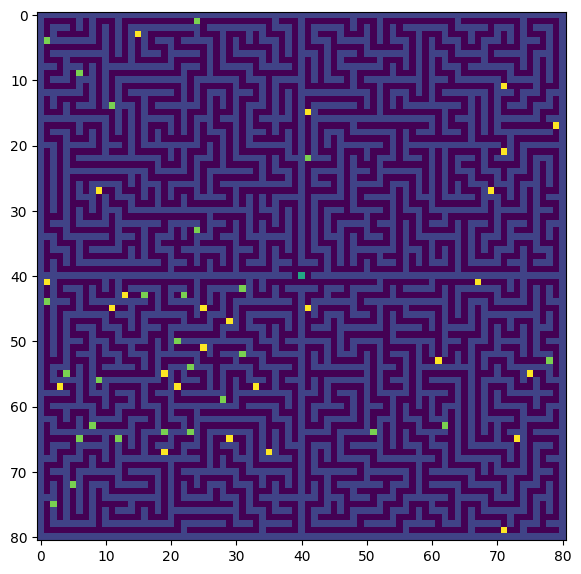

In [6]:
fig = plt.figure(figsize=(7, 7), dpi=100)
plt.imshow(maze)

A few ideas about how to solve this (when I'll have the time)

- Run "flooding" algorithm (similar to that used for "oxigen" problem on Day 15) to find closest key and closest door
- Find shortest path from found key to closest key and to door corresponding to found key. Door might be inaccessible.
- If door closest go there and open it, otherwise go to next key. Repeat.